In [192]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler 
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix, plot_roc_curve, recall_score, f1_score, precision_score
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import xgboost as xgb
import numpy as np

In [2]:
pd.set_option("display.max_columns", None)
df_all = pd.read_parquet('./Data/modeldraft1322')
df_all.columns

Index(['Draft_Yr', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To',
       'College', 'tackles_solo', 'tackles_assists', 'tackles_total',
       'tackles_loss', 'sacks', 'def_int', 'def_int_yds',
       'def_int_yds_per_int', 'def_int_td', 'pass_defended', 'fumbles_rec',
       'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced', 'rec', 'rec_yds',
       'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds', 'rush_yds_per_att',
       'rush_td', 'scrim_att', 'scrim_yds', 'scrim_yds_per_att', 'scrim_td',
       'pass_cmp', 'pass_att', 'pass_cmp_pct', 'pass_yds', 'pass_yds_per_att',
       'adj_pass_yds_per_att', 'pass_td', 'pass_int', 'pass_rating', 'height',
       'weight', 'college_conference'],
      dtype='object')

In [3]:
df = df_all.drop(['To'],axis=1)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2558 entries, 0 to 2557
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Draft_Yr              2558 non-null   float64
 1   Rnd                   2558 non-null   float64
 2   Pick                  2558 non-null   float64
 3   Tm                    2558 non-null   object 
 4   Player                2558 non-null   object 
 5   Pos                   2558 non-null   object 
 6   Age                   2555 non-null   float64
 7   College               2554 non-null   object 
 8   tackles_solo          1182 non-null   float64
 9   tackles_assists       1182 non-null   float64
 10  tackles_total         1182 non-null   float64
 11  tackles_loss          1182 non-null   float64
 12  sacks                 1182 non-null   float64
 13  def_int               1166 non-null   float64
 14  def_int_yds           1166 non-null   float64
 15  def_int_yds_per_int  

In [223]:
X = df.drop(['Rnd'],axis=1)
y = df.Rnd

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.45,random_state=42)

player_names = X_test.Player
player_team = X_test.Tm
player_pick = X_test.Pick
player_year = X_test.Draft_Yr

X_test = X_test.drop(['Player','Tm','College','height','Draft_Yr','Pick'],1)
X_train = X_train.drop(['Player','Tm','College','height','Draft_Yr','Pick'],1)

smote = SMOTE(random_state=42)
over_samp = RandomOverSampler(random_state=42)

# Separate X_train into categorical and numerical dfs
X_train_cat = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes(['float64'])

cat_transformer = Pipeline(steps=[('ohe',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('impute',SimpleImputer(strategy='constant')),
                                  ('mms',MinMaxScaler())])

transformer = ColumnTransformer(transformers=[
    ('numerical', num_transformer, X_train_num.columns),
    ('categorical', cat_transformer, X_train_cat.columns)
])

pipe = Pipeline(steps=([
    ('trans',transformer),
    ('sample',None),
    ('logr',LogisticRegression(random_state=42,solver='liblinear'))
]))

pipe.fit(X_train,y_train)

grid = {'logr__C': [1,0.95,1.05],
       'logr__fit_intercept': [True, False],
       'sample': [smote,over_samp]
       }

gridsearch = GridSearchCV(estimator=pipe,
                          param_grid=grid,
                          scoring='recall',
                          cv=5)

gridsearch.fit(X_train,y_train)

gridsearch.score(X_test, y_test)

#y_pred = pipe.predict(X_test)
y_pred = gridsearch.predict(X_test)


gridsearch.best_params_


C:\Users\capta\AppData\Local\Temp\ipykernel_25612\3808014589.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['Player','Tm','College','height','Draft_Yr','Pick'],1)
C:\Users\capta\AppData\Local\Temp\ipykernel_25612\3808014589.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['Player','Tm','College','height','Draft_Yr','Pick'],1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warni

C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Foun

{'logr__C': 1,
 'logr__fit_intercept': True,
 'sample': RandomOverSampler(random_state=42)}

In [286]:
pipe[0].transformers_[1][1].named_steps['ohe'].get_feature_names()

C:\Users\capta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_DB', 'x0_DE', 'x0_DL', 'x0_DT', 'x0_FB', 'x0_K', 'x0_LB',
       'x0_LS', 'x0_OL', 'x0_P', 'x0_QB', 'x0_RB', 'x0_S', 'x0_TE',
       'x0_WR', 'x1_Atlantic Coast Conference', 'x1_Big East',
       'x1_Big Sky Conference', 'x1_Big South Conference',
       'x1_Big Ten Conference', 'x1_Big Twelve Conference',
       'x1_Canada West Universities Athletic Association',
       'x1_Colonial Athletic Association', 'x1_Conference USA',
       'x1_Great American Conference',
       'x1_Great Lakes Intercollegiate Athletic Conference',
       'x1_Great Northwest Athletic Conference', 'x1_Independent',
       'x1_Ivy League', 'x1_Lone Star Conference',
       'x1_Mid-America Intercollegiate Athletic Association',
       'x1_Mid-American Conference', 'x1_Mid-Eastern Athletic Conference',
       'x1_Missouri Valley Football Conference',
       'x1_Mountain West Conference', 'x1_NO COLLEGE',
       'x1_Northeast Conference',
       'x1_Northern Sun Intercollegiate Conference',
       'x1_O

In [6]:
feature_names = ['x0_DB', 'x0_DE', 'x0_DL', 'x0_DT', 'x0_FB', 'x0_K', 'x0_LB',
       'x0_LS', 'x0_OL', 'x0_P', 'x0_QB', 'x0_RB', 'x0_S', 'x0_TE',
       'x0_WR', 'Age', 'tackles_solo', 'tackles_assists', 'tackles_total',
       'tackles_loss', 'sacks', 'def_int', 'def_int_yds',
       'def_int_yds_per_int', 'def_int_td', 'pass_defended', 'fumbles_rec',
       'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced', 'rec', 'rec_yds',
       'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds', 'rush_yds_per_att',
       'rush_td', 'scrim_att', 'scrim_yds', 'scrim_yds_per_att', 'scrim_td',
       'pass_cmp', 'pass_att', 'pass_cmp_pct', 'pass_yds', 'pass_yds_per_att',
       'adj_pass_yds_per_att', 'pass_td', 'pass_int', 'pass_rating', 'weight','x1_Atlantic Coast Conference', 'x1_Big East',
       'x1_Big Sky Conference', 'x1_Big South Conference',
       'x1_Big Ten Conference', 'x1_Big Twelve Conference',
       'x1_Canada West Universities Athletic Association',
       'x1_Colonial Athletic Association', 'x1_Conference USA',
       'x1_Great American Conference',
       'x1_Great Lakes Intercollegiate Athletic Conference',
       'x1_Great Northwest Athletic Conference', 'x1_Independent',
       'x1_Ivy League', 'x1_Lone Star Conference',
       'x1_Mid-America Intercollegiate Athletic Association',
       'x1_Mid-American Conference', 'x1_Mid-Eastern Athletic Conference',
       'x1_Missouri Valley Football Conference',
       'x1_Mountain West Conference', 'x1_NO COLLEGE',
       'x1_Northeast Conference',
       'x1_Northern Sun Intercollegiate Conference',
       'x1_Ohio Valley Conference', 'x1_Pacific Twelve Conference',
       'x1_Patriot League', 'x1_Pennsylvania State Athletic Conference',
       'x1_Pioneer Football League',
       'x1_Rocky Mountain Athletic Conference',
       'x1_South Atlantic Conference', 'x1_Southeastern Conference',
       'x1_Southern Conference',
       'x1_Southern Intercollegiate Athletic Conference',
       'x1_Southland Conference', 'x1_Southwestern Athletic Conference',
       'x1_Sun Belt Conference', 'x1_Western Athletic Conference',
       'x1_None']

In [11]:
cols = ['Age',
 'tackles_solo',
 'tackles_assists',
 'tackles_total',
 'tackles_loss',
 'sacks',
 'def_int',
 'def_int_yds',
 'def_int_yds_per_int',
 'def_int_td',
 'pass_defended',
 'fumbles_rec',
 'fumbles_rec_yds',
 'fumbles_rec_td',
 'fumbles_forced',
 'rec',
 'rec_yds',
 'rec_yds_per_rec',
 'rec_td',
 'rush_att',
 'rush_yds',
 'rush_yds_per_att',
 'rush_td',
 'scrim_att',
 'scrim_yds',
 'scrim_yds_per_att',
 'scrim_td',
 'pass_cmp',
 'pass_att',
 'pass_cmp_pct',
 'pass_yds',
 'pass_yds_per_att',
 'adj_pass_yds_per_att',
 'pass_td',
 'pass_int',
 'pass_rating',
 'weight']

In [ ]:
coefs = pipe[-1].coef_.flatten()

In [14]:
zipped = pd.DataFrame(list(zip(feature_names,coefs)))

In [ ]:
minmax = zipped.iloc[15:52,1]

In [ ]:
inverse_weights = minmax.apply(lambda x: x - minmax.min() / (minmax.max() - minmax.min()))

In [ ]:
zipped.iloc[15:52,1] = inverse_weights

In [87]:
pd.set_option("display.max_rows", None)
zipped.columns = ['Col','Weight']
zipped.sort_values(by='Weight')

Col    Weight
0                                               x0_DB -2.866118
71                        x1_Mountain West Conference -1.149401
87                             x1_Sun Belt Conference -0.815283
11                                              x0_RB -0.761449
48                                            pass_td -0.558943
50                                        pass_rating -0.553481
2                                               x0_DL -0.513548
60                                  x1_Conference USA -0.452017
59                   x1_Colonial Athletic Association -0.411318
68                         x1_Mid-American Conference -0.410713
8                                               x0_OL -0.356593
54                              x1_Big Sky Conference -0.334303
53                                        x1_Big East -0.328322
75                          x1_Ohio Valley Conference -0.322286
85                            x1_Southland Conference -0.261216
67  x1_Mid-America Intercollegiate Athletic Associ... -0.257704
9                                                x0_P -0.246044
69                 x1_Mid-Eastern Athletic Conference -0.190321
55                            x1_Big South Conference -0.187724
51                                             weight -0.184570
65                                      x1_Ivy League -0.180198
72                                      x1_NO COLLEGE -0.111872
80              x1_Rocky Mountain Athletic Conference -0.101041
77                                  x1_Patriot League -0.092875
73                            x1_Northeast Conference -0.091716
63             x1_Great Northwest Athletic Conference -0.091716
79                         x1_Pioneer Football League -0.087019
88                     x1_Western Athletic Conference -0.072720
61                       x1_Great American Conference -0.066642
66                            x1_Lone Star Conference -0.055753
81                       x1_South Atlantic Conference -0.048587
42                                           pass_cmp -0.045630
84    x1_Southern Intercollegiate Athletic Conference -0.036155
58   x1_Canada West Universities Athletic Association -0.035780
46                                   pass_yds_per_att -0.028160
74         x1_Northern Sun Intercollegiate Conference -0.026609
78          x1_Pennsylvania State Athletic Conference -0.026609
3                                               x0_DT -0.020697
62  x1_Great Lakes Intercollegiate Athletic Confer... -0.017411
34                                           rush_att  0.058739
38                                          scrim_att  0.090005
57                           x1_Big Twelve Conference  0.094627
89                                            x1_None  0.105971
13                                              x0_TE  0.131900
43                                           pass_att  0.167669
41                                           scrim_td  0.171920
14                                              x0_WR  0.188094
49                                           pass_int  0.190043
7                                               x0_LS  0.221343
28                                     fumbles_rec_td  0.277380
40                                  scrim_yds_per_att  0.280543
23                                def_int_yds_per_int  0.293154
39                                          scrim_yds  0.302726
19                                       tackles_loss  0.309478
44                                       pass_cmp_pct  0.320066
1                                               x0_DE  0.343861
83                             x1_Southern Conference  0.358943
15                                                Age  0.366665
86                x1_Southwestern Athletic Conference  0.405581
56                              x1_Big Ten Conference  0.410219
27                                    fumbles_rec_yds  0.426573
17                                    tackles_assists  0.433494
6                 

In [52]:
#weights = pd.DataFrame(pipe[0].transformers_[0][1].named_steps['mms'].inverse_transform(inverse))

In [109]:
X = df.drop(['Rnd'],axis=1)
y = df.Rnd

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.45,random_state=42)

player_names = X_test.Player
player_team = X_test.Tm
X_test = X_test.drop(['Player','Tm','College','height','Pick'],1)
X_train = X_train.drop(['Player','Tm','College','height','Pick'],1)

smote = SMOTE(random_state=42)
over_samp = RandomOverSampler(random_state=42)

X_train_cat = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes(['float64'])

cat_transformer = Pipeline(steps=[('ohe',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('impute',SimpleImputer(strategy='constant')),
                                  ('mms',MinMaxScaler())])

transformer = ColumnTransformer(transformers=[
    ('numerical', num_transformer, X_train_num.columns),
    ('categorical', cat_transformer, X_train_cat.columns)
])

pipe_tree = Pipeline(steps=([
    ('trans',transformer),
    ('smote',smote),
    ('forest',RandomForestClassifier(random_state=42))
]))

grid = {'forest__criterion': ['gini'],
        'forest__max_depth': [2],
        'forest__min_samples_split': [2],
        'forest__min_samples_leaf': [1],
        'forest__n_estimators': [117]
       }

gridsearch = GridSearchCV(estimator=pipe_tree,
                          param_grid=grid,
                          scoring='recall',
                          cv=5)

#pipe_tree.fit(X_train,y_train)

#y_pred = pipe_tree.predict(X_test)
gridsearch.fit(X_train,y_train)
y_pred = gridsearch.predict(X_test)
gridsearch.best_params_

C:\Users\capta\AppData\Local\Temp\ipykernel_25612\1884930202.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['Player','Tm','College','height','Pick'],1)
C:\Users\capta\AppData\Local\Temp\ipykernel_25612\1884930202.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['Player','Tm','College','height','Pick'],1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta

{'forest__criterion': 'gini',
 'forest__max_depth': 2,
 'forest__min_samples_leaf': 1,
 'forest__min_samples_split': 2,
 'forest__n_estimators': 117}

In [116]:
X = df.drop(['Rnd'],axis=1)
y = df.Rnd

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.45,random_state=42)

player_names = X_test.Player
player_team = X_test.Tm
X_test = X_test.drop(['Player','Tm','College','height','Pick'],1)
X_train = X_train.drop(['Player','Tm','College','height','Pick'],1)

smote = SMOTE(random_state=42)
over_samp = RandomOverSampler(random_state=42)

X_train_cat = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes(['float64'])

cat_transformer = Pipeline(steps=[('ohe',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('impute',SimpleImputer(strategy='constant')),
                                  ('mms',MinMaxScaler())])

transformer = ColumnTransformer(transformers=[
    ('numerical', num_transformer, X_train_num.columns),
    ('categorical', cat_transformer, X_train_cat.columns)
])

pipe_tree = Pipeline(steps=([
    ('trans',transformer),
    ('smote',smote),
    ('tree',DecisionTreeClassifier(random_state=42))
]))

grid = {'tree__criterion': ['gini','entropy','log_loss'],
        'tree__max_depth': [1,2,4,None],
        'tree__min_samples_split': [1,2,3],
        'tree__min_samples_leaf': [1,2]
       }

gridsearch = GridSearchCV(estimator=pipe_tree,
                          param_grid=grid,
                          scoring='recall',
                          cv=5)

#pipe_tree.fit(X_train,y_train)

#y_pred = pipe_tree.predict(X_test)
gridsearch.fit(X_train,y_train)
y_pred = gridsearch.predict(X_test)
gridsearch.best_params_

C:\Users\capta\AppData\Local\Temp\ipykernel_25612\77069715.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['Player','Tm','College','height','Pick'],1)
C:\Users\capta\AppData\Local\Temp\ipykernel_25612\77069715.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['Player','Tm','College','height','Pick'],1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\ana

C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Foun

C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Foun

C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Foun

C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Foun

{'tree__criterion': 'entropy',
 'tree__max_depth': 1,
 'tree__min_samples_leaf': 1,
 'tree__min_samples_split': 2}

In [126]:
X = df.drop(['Rnd'],axis=1)
y = df.Rnd

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.45,random_state=42)

player_names = X_test.Player
player_team = X_test.Tm
X_test = X_test.drop(['Player','Tm','College','height','Pick'],1)
X_train = X_train.drop(['Player','Tm','College','height','Pick'],1)

smote = SMOTE(random_state=42)
over_samp = RandomOverSampler(random_state=42)

# Separate X_train into categorical and numerical dfs
X_train_cat = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes(['float64'])

cat_transformer = Pipeline(steps=[('ohe',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('impute',SimpleImputer(strategy='constant')),
                                  ('mms',MinMaxScaler())])

transformer = ColumnTransformer(transformers=[
    ('numerical', num_transformer, X_train_num.columns),
    ('categorical', cat_transformer, X_train_cat.columns)
])

pipe = Pipeline(steps=([
    ('trans',transformer),
    ('sample',None),
    ('xgb',xgb.XGBClassifier(random_state=42))
]))


grid = {"xgb__gamma": [36.5, 35.5, 34.5],
        "xgb__learning_rate": [0.0043, 0.0041, 0.0045],
        "xgb__max_depth": [11],
        "xgb__min_child_weight": [3],
        "xgb__n_estimators": [30],
        "sample": [smote,over_samp]
       }

gridsearch = GridSearchCV(estimator=pipe,
                          param_grid=grid,
                          scoring='recall',
                          cv=5)

gridsearch.fit(X_train,y_train)

gridsearch.score(X_test, y_test)

#y_pred = pipe.predict(X_test)
y_pred = gridsearch.predict(X_test)
gridsearch.best_params_


C:\Users\capta\AppData\Local\Temp\ipykernel_25612\2865527637.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['Player','Tm','College','height','Pick'],1)
C:\Users\capta\AppData\Local\Temp\ipykernel_25612\2865527637.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['Player','Tm','College','height','Pick'],1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta

C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Foun

C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Foun

{'sample': RandomOverSampler(random_state=42),
 'xgb__gamma': 35.5,
 'xgb__learning_rate': 0.0043,
 'xgb__max_depth': 11,
 'xgb__min_child_weight': 3,
 'xgb__n_estimators': 30}

In [186]:
X = df.drop(['Rnd'],axis=1)
y = df.Rnd

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.45,random_state=42)

player_names = X_test.Player
player_team = X_test.Tm
player_pick = X_test.Pick
player_year = X_test.Draft_Yr

X_test = X_test.drop(['Player','Tm','College','height','Draft_Yr','Pick'],1)
X_train = X_train.drop(['Player','Tm','College','height','Draft_Yr','Pick'],1)

smote = SMOTE(random_state=42)
over_samp = RandomOverSampler(random_state=42)

# Separate X_train into categorical and numerical dfs
X_train_cat = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes(['float64'])

cat_transformer = Pipeline(steps=[('ohe',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('impute',SimpleImputer(strategy='constant')),
                                  ('mms',MinMaxScaler())])

transformer = ColumnTransformer(transformers=[
    ('numerical', num_transformer, X_train_num.columns),
    ('categorical', cat_transformer, X_train_cat.columns)
])

pipe = Pipeline(steps=([
    ('trans',transformer),
    ('sample',None),
    ('knn',KNeighborsClassifier())
]))

pipe.fit(X_train,y_train)

grid = {'knn__n_neighbors': [9],
       'knn__p': [1,2],
       'knn__leaf_size':[25,24,26],
       'knn__algorithm':['ball_tree','auto','kd_tree'],
       'sample': [smote,over_samp]
       }

gridsearch = GridSearchCV(estimator=pipe,
                          param_grid=grid,
                          scoring='recall',
                          cv=5)

gridsearch.fit(X_train,y_train)

gridsearch.score(X_test, y_test)

#y_pred = pipe.predict(X_test)
y_pred = gridsearch.predict(X_test)


gridsearch.best_params_


C:\Users\capta\AppData\Local\Temp\ipykernel_25612\1004571293.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['Player','Tm','College','height','Draft_Yr','Pick'],1)
C:\Users\capta\AppData\Local\Temp\ipykernel_25612\1004571293.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['Player','Tm','College','height','Draft_Yr','Pick'],1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the 

C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\U

C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts a

C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts a

C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts a

C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts a

C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts a

C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts a

C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\U

C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts a

C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts a

C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts a

C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\U

C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\U

C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\U

C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts a

{'knn__algorithm': 'ball_tree',
 'knn__leaf_size': 25,
 'knn__n_neighbors': 9,
 'knn__p': 1,
 'sample': RandomOverSampler(random_state=42)}

In [217]:
X = df.drop(['Rnd'],axis=1)
y = df.Rnd

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.45,random_state=42)

player_names = X_test.Player
player_team = X_test.Tm
player_pick = X_test.Pick
player_year = X_test.Draft_Yr

X_test = X_test.drop(['Player','Tm','College','height','Draft_Yr','Pick'],1)
X_train = X_train.drop(['Player','Tm','College','height','Draft_Yr','Pick'],1)

smote = SMOTE(random_state=42)
over_samp = RandomOverSampler(random_state=42)

# Separate X_train into categorical and numerical dfs
X_train_cat = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes(['float64'])

cat_transformer = Pipeline(steps=[('ohe',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('impute',SimpleImputer(strategy='constant')),
                                  ('mms',MinMaxScaler())])

transformer = ColumnTransformer(transformers=[
    ('numerical', num_transformer, X_train_num.columns),
    ('categorical', cat_transformer, X_train_cat.columns)
])

pipe = Pipeline(steps=([
    ('trans',transformer),
    ('sample',None),
    ('gau',GaussianNB())
]))

pipe.fit(X_train,y_train)

grid = {'gau__var_smoothing':[1,.1,.01],
        'sample': [smote,over_samp]
       }

gridsearch = GridSearchCV(estimator=pipe,
                          param_grid=grid,
                          scoring='recall',
                          cv=5)

gridsearch.fit(X_train,y_train)

gridsearch.score(X_test, y_test)

#y_pred = pipe.predict(X_test)
y_pred = gridsearch.predict(X_test)


gridsearch.best_params_


C:\Users\capta\AppData\Local\Temp\ipykernel_25612\2882013716.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['Player','Tm','College','height','Draft_Yr','Pick'],1)
C:\Users\capta\AppData\Local\Temp\ipykernel_25612\2882013716.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['Player','Tm','College','height','Draft_Yr','Pick'],1)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warni

{'gau__var_smoothing': 0.01, 'sample': RandomOverSampler(random_state=42)}

In [224]:
f1_score(y_test,y_pred)

0.3

In [225]:
accuracy_score(y_test,y_pred)

0.671875

In [226]:
recall_score(y_test,y_pred)

0.6090225563909775

In [227]:
precision_score(y_test,y_pred)

0.19901719901719903

C:\Users\capta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\capta\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


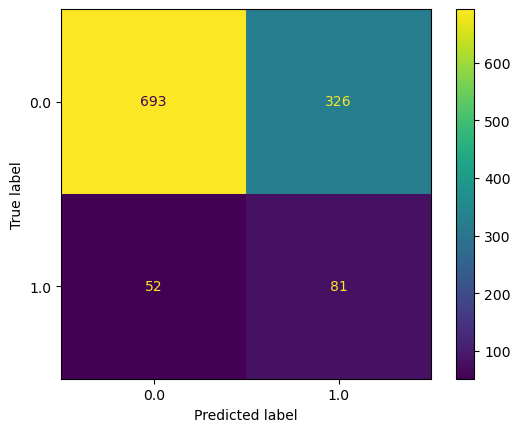

In [228]:
plot_confusion_matrix(gridsearch,X_test,y_test);

In [174]:
pd.set_option("display.max_rows", None)

results = pd.concat([player_year.reset_index(),player_pick.reset_index(),player_names.reset_index(),y_test.reset_index(),pd.Series(y_pred),X_test.reset_index()],axis=1).sort_values(by=['Draft_Yr','Pick'],ascending=[False,True])

In [176]:
results[results[0]==0]

Empty DataFrame
Columns: [index, Draft_Yr, index, Pick, index, Player, index, Rnd, 0, index, Pos, Age, tackles_solo, tackles_assists, tackles_total, tackles_loss, sacks, def_int, def_int_yds, def_int_yds_per_int, def_int_td, pass_defended, fumbles_rec, fumbles_rec_yds, fumbles_rec_td, fumbles_forced, rec, rec_yds, rec_yds_per_rec, rec_td, rush_att, rush_yds, rush_yds_per_att, rush_td, scrim_att, scrim_yds, scrim_yds_per_att, scrim_td, pass_cmp, pass_att, pass_cmp_pct, pass_yds, pass_yds_per_att, adj_pass_yds_per_att, pass_td, pass_int, pass_rating, weight, college_conference]
Index: []

In [251]:
x = results[(results[0]!=results.Rnd) & (results.Rnd == 1)]
x.Pos.value_counts()

LB    9
WR    8
TE    6
DB    5
CB    5
DT    5
S     4
OL    3
DE    3
QB    2
RB    2
Name: Pos, dtype: int64

In [260]:
results[(results.Pos == 'TE') & (results.Rnd == 1)]

index  Draft_Yr  index  Pick  index          Player  index  Rnd    0  \
612   1535    2019.0   1535   8.0   1535  T.J. Hockenson   1535  1.0  0.0   
781   1037    2017.0   1037  19.0   1037     O.J. Howard   1037  1.0  0.0   
156   1041    2017.0   1041  23.0   1041     Evan Engram   1041  1.0  0.0   
979   1047    2017.0   1047  29.0   1047     David Njoku   1047  1.0  0.0   
811    263    2014.0    263  10.0    263      Eric Ebron    263  1.0  0.0   
939     20    2013.0     20  21.0     20    Tyler Eifert     20  1.0  0.0   

     index Pos   Age  tackles_solo  tackles_assists  tackles_total  \
612   1535  TE  22.0           NaN              NaN            NaN   
781   1037  TE  22.0           NaN              NaN            NaN   
156   1041  TE  23.0           NaN              NaN            NaN   
979   1047  TE  21.0           NaN              NaN            NaN   
811    263  TE  21.0           NaN              NaN            NaN   
939     20  TE  22.0           NaN              NaN            NaN   

     tackles_loss  sacks  def_int  def_int_yds  def_int_yds_per_int  \
612           NaN    NaN      NaN          NaN                  NaN   
781           NaN    NaN      NaN          NaN                  NaN   
156           NaN    NaN      NaN          NaN                  NaN   
979           NaN    NaN      NaN          NaN                  NaN   
811           NaN    NaN      NaN          NaN                  NaN   
939           NaN    NaN      NaN          NaN                  NaN   

     def_int_td  pass_defended  fumbles_rec  fumbles_rec_yds  fumbles_rec_td  \
612         NaN            NaN          NaN              NaN             NaN   
781         NaN            NaN          NaN              NaN             NaN   
156         NaN            NaN          NaN              NaN             NaN   
979         NaN            NaN          NaN              NaN             NaN   
811         NaN            NaN          NaN              NaN             NaN   
939         NaN            NaN          NaN              NaN             NaN   

     fumbles_forced    rec  rec_yds  rec_yds_per_rec  rec_td  rush_att  \
612             NaN   73.0   1080.0             14.8     9.0       1.0   
781             NaN  114.0   1726.0             15.1     7.0       NaN   
156             NaN  162.0   2320.0             14.3    15.0       NaN   
979             NaN   64.0   1060.0             16.6     9.0       NaN   
811             NaN  112.0   1805.0             16.1     8.0       2.0   
939             NaN  140.0   1840.0             13.1    11.0       NaN   

     rush_yds  rush_yds_per_att  rush_td  scrim_att  scrim_yds  \
612       4.0               4.0      1.0       74.0     1084.0   
781       NaN               NaN      NaN      114.0     1726.0   
156       NaN               NaN      NaN      162.0     2320.0   
979       NaN               NaN      NaN       64.0     1060.0   
811       7.0               3.5      NaN      114.0     1812.0   
939       NaN               NaN      NaN      140.0     1840.0   

     scrim_yds_per_att  scrim_td  pass_cmp  pass_att  pass_cmp_pct  pass_yds  \
612               14.6      10.0       NaN       NaN           NaN       NaN   
781               15.1       7.0       NaN       NaN           NaN       NaN   
156               14.3      15.0       NaN       NaN           NaN       NaN   
979               16.6       9.0       NaN       NaN           NaN       NaN   
811               15.9       8.0       NaN       NaN           NaN       NaN   
939               13.1      11.0       NaN       NaN           NaN       NaN   

     pass_yds_per_att  adj_pass_yds_per_att  pass_td  pass_int  pass_rating  \
612               NaN                   NaN      NaN       NaN          NaN   
781               NaN                   NaN      NaN       NaN          NaN   
156               NaN                   NaN      NaN       NaN          NaN   
979               NaN                   NaN      NaN    

In [255]:
x[x.Pos == 'TE']

index  Draft_Yr  index  Pick  index          Player  index  Rnd    0  \
612   1535    2019.0   1535   8.0   1535  T.J. Hockenson   1535  1.0  0.0   
781   1037    2017.0   1037  19.0   1037     O.J. Howard   1037  1.0  0.0   
156   1041    2017.0   1041  23.0   1041     Evan Engram   1041  1.0  0.0   
979   1047    2017.0   1047  29.0   1047     David Njoku   1047  1.0  0.0   
811    263    2014.0    263  10.0    263      Eric Ebron    263  1.0  0.0   
939     20    2013.0     20  21.0     20    Tyler Eifert     20  1.0  0.0   

     index Pos   Age  tackles_solo  tackles_assists  tackles_total  \
612   1535  TE  22.0           NaN              NaN            NaN   
781   1037  TE  22.0           NaN              NaN            NaN   
156   1041  TE  23.0           NaN              NaN            NaN   
979   1047  TE  21.0           NaN              NaN            NaN   
811    263  TE  21.0           NaN              NaN            NaN   
939     20  TE  22.0           NaN              NaN            NaN   

     tackles_loss  sacks  def_int  def_int_yds  def_int_yds_per_int  \
612           NaN    NaN      NaN          NaN                  NaN   
781           NaN    NaN      NaN          NaN                  NaN   
156           NaN    NaN      NaN          NaN                  NaN   
979           NaN    NaN      NaN          NaN                  NaN   
811           NaN    NaN      NaN          NaN                  NaN   
939           NaN    NaN      NaN          NaN                  NaN   

     def_int_td  pass_defended  fumbles_rec  fumbles_rec_yds  fumbles_rec_td  \
612         NaN            NaN          NaN              NaN             NaN   
781         NaN            NaN          NaN              NaN             NaN   
156         NaN            NaN          NaN              NaN             NaN   
979         NaN            NaN          NaN              NaN             NaN   
811         NaN            NaN          NaN              NaN             NaN   
939         NaN            NaN          NaN              NaN             NaN   

     fumbles_forced    rec  rec_yds  rec_yds_per_rec  rec_td  rush_att  \
612             NaN   73.0   1080.0             14.8     9.0       1.0   
781             NaN  114.0   1726.0             15.1     7.0       NaN   
156             NaN  162.0   2320.0             14.3    15.0       NaN   
979             NaN   64.0   1060.0             16.6     9.0       NaN   
811             NaN  112.0   1805.0             16.1     8.0       2.0   
939             NaN  140.0   1840.0             13.1    11.0       NaN   

     rush_yds  rush_yds_per_att  rush_td  scrim_att  scrim_yds  \
612       4.0               4.0      1.0       74.0     1084.0   
781       NaN               NaN      NaN      114.0     1726.0   
156       NaN               NaN      NaN      162.0     2320.0   
979       NaN               NaN      NaN       64.0     1060.0   
811       7.0               3.5      NaN      114.0     1812.0   
939       NaN               NaN      NaN      140.0     1840.0   

     scrim_yds_per_att  scrim_td  pass_cmp  pass_att  pass_cmp_pct  pass_yds  \
612               14.6      10.0       NaN       NaN           NaN       NaN   
781               15.1       7.0       NaN       NaN           NaN       NaN   
156               14.3      15.0       NaN       NaN           NaN       NaN   
979               16.6       9.0       NaN       NaN           NaN       NaN   
811               15.9       8.0       NaN       NaN           NaN       NaN   
939               13.1      11.0       NaN       NaN           NaN       NaN   

     pass_yds_per_att  adj_pass_yds_per_att  pass_td  pass_int  pass_rating  \
612               NaN                   NaN      NaN       NaN          NaN   
781               NaN                   NaN      NaN       NaN          NaN   
156               NaN                   NaN      NaN       NaN          NaN   
979               NaN                   NaN      NaN    

In [257]:
df[(df.Pos == 'TE') & (df.Rnd == 1)]

Draft_Yr  Rnd  Pick   Tm          Player Pos   Age         College  \
20      2013.0  1.0  21.0  CIN    Tyler Eifert  TE  22.0      Notre Dame   
263     2014.0  1.0  10.0  DET      Eric Ebron  TE  21.0  North Carolina   
1037    2017.0  1.0  19.0  TAM     O.J. Howard  TE  22.0         Alabama   
1041    2017.0  1.0  23.0  NYG     Evan Engram  TE  23.0     Mississippi   
1047    2017.0  1.0  29.0  CLE     David Njoku  TE  21.0      Miami (FL)   
1296    2018.0  1.0  25.0  BAL    Hayden Hurst  TE  25.0  South Carolina   
1535    2019.0  1.0   8.0  DET  T.J. Hockenson  TE  22.0            Iowa   
1547    2019.0  1.0  20.0  DEN       Noah Fant  TE  21.0            Iowa   
2040    2021.0  1.0   4.0  ATL      Kyle Pitts  TE  20.0         Florida   

      tackles_solo  tackles_assists  tackles_total  tackles_loss  sacks  \
20             NaN              NaN            NaN           NaN    NaN   
263            NaN              NaN            NaN           NaN    NaN   
1037           NaN              NaN            NaN           NaN    NaN   
1041           NaN              NaN            NaN           NaN    NaN   
1047           NaN              NaN            NaN           NaN    NaN   
1296           NaN              NaN            NaN           NaN    NaN   
1535           NaN              NaN            NaN           NaN    NaN   
1547           NaN              NaN            NaN           NaN    NaN   
2040           NaN              NaN            NaN           NaN    NaN   

      def_int  def_int_yds  def_int_yds_per_int  def_int_td  pass_defended  \
20        NaN          NaN                  NaN         NaN            NaN   
263       NaN          NaN                  NaN         NaN            NaN   
1037      NaN          NaN                  NaN         NaN            NaN   
1041      NaN          NaN                  NaN         NaN            NaN   
1047      NaN          NaN                  NaN         NaN            NaN   
1296      NaN          NaN                  NaN         NaN            NaN   
1535      NaN          NaN                  NaN         NaN            NaN   
1547      NaN          NaN                  NaN         NaN            NaN   
2040      NaN          NaN                  NaN         NaN            NaN   

      fumbles_rec  fumbles_rec_yds  fumbles_rec_td  fumbles_forced    rec  \
20            NaN              NaN             NaN             NaN  140.0   
263           NaN              NaN             NaN             NaN  112.0   
1037          NaN              NaN             NaN             NaN  114.0   
1041          NaN              NaN             NaN             NaN  162.0   
1047          NaN              NaN             NaN             NaN   64.0   
1296          NaN              NaN             NaN             NaN  100.0   
1535          NaN              NaN             NaN             NaN   73.0   
1547          NaN              NaN             NaN             NaN   78.0   
2040          NaN              NaN             NaN             NaN  100.0   

      rec_yds  rec_yds_per_rec  rec_td  rush_att  rush_yds  rush_yds_per_att  \
20     1840.0             13.1    11.0       NaN       NaN               NaN   
263    1805.0             16.1     8.0       2.0       7.0               3.5   
1037   1726.0             15.1     7.0       NaN       NaN               NaN   
1041   2320.0             14.3    15.0       NaN       NaN               NaN   
1047   1060.0             16.6     9.0       NaN       NaN               NaN   
1296   1281.0             12.8     3.0      11.0      39.0               3.5   
1535   1080.0             14.8     9.0       1.0       4.0               4.0   
1547   1083.0             13.9    19.0       4.0       NaN               NaN   
2040   1492.0             14.9    18.0       NaN       NaN               NaN   

      rush_td  scrim_att  scrim_yds  scrim_yds_per_att  scrim_td  pass_cmp  \
20        NaN      140.0     1840.0               13.1      11.